# Pipelines en ML

## Que son los pipelines en Machine Learning?
Los pipelines en Machine Learning son herramientas o estructuras que permiten organizar, estructurar y automatizar los procesos de procesamiento de datos, entrenamiento y evaluación de modelos de manera ordenada y reproducible. Su objetivo principal es simplificar los flujos de trabajo complejos, asegurando que los pasos individuales se ejecuten de manera secuencial y consistente.

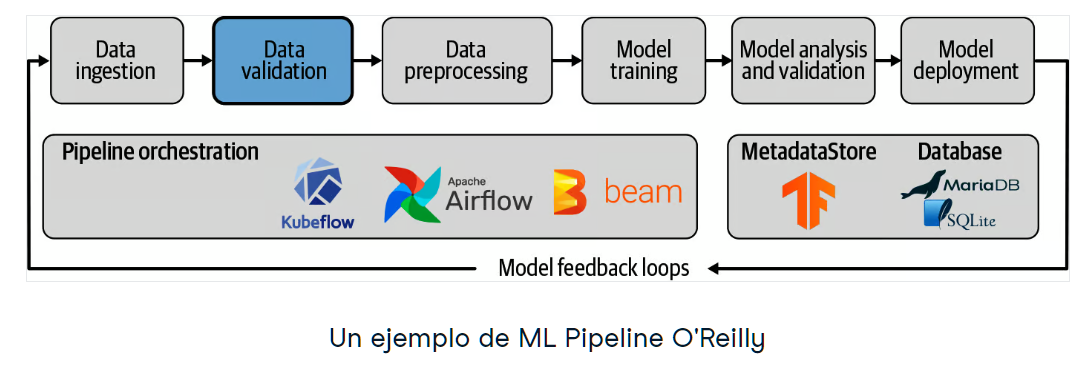

## ¿ Por qué usar pipelines 
1. Reproducibilidad: Facilitan replicar los resultados al mantener todos los datos organizados.
2. Automatización: Simplifican la ejecución repetitiva de tareas, como procesamiento y validación.
3. Reducción de errores: Minimizan errores que podrían surgir al ejecutar pasos manualmente.
4. Integración con validación cruzada: Permiten incluir pasos de preprocesamiento y modelo de procesos de validación cruzada.
5. Modularidad: Hacen que los pasos sean intercambiables, facilitan probar diferentes combinaciones.

# Componentes de un pipeline.
Un pipeline suele incluir los siguientes pasos:
1. Preprocesamiento de datos:
   - Manejo de valores faltantes.
   - Escalado de variables.
   - Codificación de variables categóricas.
     
3. Selección de caracteristicas

   - Eliminación de variables irrelevantes.
   - Reducción de dimensionalidad.

5. Modelo

   - Entrenamiento del modelo con los datos procesados.

7. Evaluación

   -Validación cruzada o evaluación final con métricas

# Ejemplo de un pipeline

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

## 1. Cargar el conjunto de datos

In [15]:
data = fetch_california_housing(as_frame=True) 
df = data.frame

# Aadir una columna ficticia para el ejemplo
df['Region'] = np.random.choice(['A','B','C'], size=len(df))

# Separar las caracteristicas y la variable objetivo
X = df.drop('MedHouseVal', axis=1)
y=df['MedHouseVal']
# Dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

# Definir las columnas numéricas y categoricas
x_numeric = X.select_dtypes(include=['float64']).columns
x_categoric = ['Region']

# Preprocesamiento de columnas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, x_numeric),   #Escaliza
          ('cat', categorical_transformer, x_categoric)
      ]
)

## Crear el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Entrenar el modelo usando el pipeline
pipeline.fit(X_train, y_train)

#Evaluar el modelo
score = pipeline.score(X_test, y_test)

print(f"R^2 del modelo en los datos de prueba: {score:.2f}")
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Validación cruzada (R^2): {cv_scores}")

R^2 del modelo en los datos de prueba: 0.58
Validación cruzada (R^2): [0.54832836 0.46815309 0.55075282 0.53695279 0.66054218]


# Explicamos
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
1. Preprocesamiento:
   - Realizamos una tarea de escalizar (Estandarizado) las columnas del dataset.
   - Realizamos la tarea de codificar la columna categorica
2. Entrenamiento
   La segunda tarea es la de entrenar el modelo

# Transformadores en Machine Learning

## Tipos comunes de transformadores y su uso

### Escalamiento (Scalin)
Se utiliza para ajustar los valores numéricos dentro de un rango específico. Esto es util por que muchos modelos son sensibles a las magnitudes de las variables.

### Min_Max Scaling: Escala los datos entre un rango especíco [0,1]

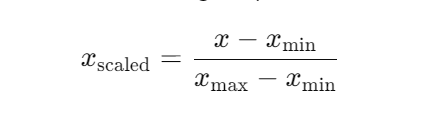
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datos_ecalados = scaler.fit_transform(data)

### Estandarización  (Standard Scaling)
Centra los datos en torno a la media y los escala según la desviacion estandar

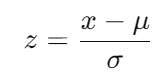

sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_escalado = scaler.fit_transform(data)

# Transformacion de variables catagóricas
Las variables catagoricas no pueden ser usadas directamente por los modelos porque no entienden texti, por ello, necesitamos convertirlas a númericos.

# 1. OneHotencoding
   from sklearn.preprocessing import OneHotEncoder
   encoder = OneHotEncoder()

   data_encoded = encoder.fit_transform(data[['categoria]]).toarray()
   
# 3. Manejo de valores faltantes
Los datos faltantes son comunes y deben ser manejados antes de entrenar el modelo.

## Imputación simple: Rellenar valores faltantes con la media, mediana, la moda.

- from sklearn.impute import SimpleImputer
- data_imputed = SimpleImputer(strategy='mean')
- date_imputed = imputer.fit_transform(data)

4. Codificación de variables ordinales con orden inherente (como: medio, bajo, alto)

   - from sklearn.preprocessing import OrdinalEncoder
   - encoder = OrdinalEncoder(categories=[["bajo", "medio", "alto"]])
   - data_encoded = encoder.fit_transform(data[[]'nivel])

# Clase de Pipelines

# 1. Carga de librerías

# Robuster De la librería scikit-learn de python 
Es una herramienta para la normalización de datos que se utiliza para escalar las caracteristicas mientras es robusta a los valores atípicos.
A diferencia de otros métodos de escalado, como el standardScaler o el MinMaxScaler, el RobusterScaler utiliza los cuartiles en lugar de la media y la desviación estándar para escalar los datos.

# Caracteristicas principales de RobusterScaler
1. Basado en estadísticos robustos:
   - Utliliza la mediana y el rango intercuartílico (IQR) ( El rango entre el percentil 25 y el percentil 75)
   - Es menos sencible a los valores extremos
3. Transformación de los datos.
   - Resta la mediana de cada carácteristica
   - escala los valores dividiendolos por el IQR
5. Ideal para datos con outliers:
   - Funciona bien en escenarios con datos atípicos significativos.
  
## Formula aplicada por RobustScaler 

# Xexcaled = (X - mediana(X))/IQR(X)

In [10]:
import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Funciones auxiliares

In [11]:
 """Lectura del conjunto de datos"""

def load_kdd_dataset(data_path):
    with open(data_path, 'r') as grupo_entreno:
        dataset=arff.load(grupo_entreno)
        attributes = [attr[0] for attr in dataset["attributes"]]
        DF = pd.DataFrame(dataset["data"], columns = attributes)
        return DF

In [12]:
"""Función para dividir  el conjunto de datos """

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None       
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return train_set, val_set, test_set


In [27]:
""" Lectura del conjunto de datos """
df = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")

In [28]:
#df

# División del conjunto de datos

In [29]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type', shuffle=True)

In [20]:
print("Longitud del Trainning Set: ", len(train_set))
print("Longitud del Validation Set: ", len(val_set))
print("Longitud del Test Set: ", len(test_set))

Longitud del Trainning Set:  75583
Longitud del Validation Set:  25195
Longitud del Test Set:  25195


# 1. Construyendo los transformadores personalizados


In [30]:
""" Obtengo un conjunto de datos sin la caracteristica de la clase """

X_train =train_set.drop("class", axis=1)  #Se separa la etiqueta
y_train = train_set["class"].copy()

# 2. Transformadores

In [31]:
"""Para ilustrar el caso de que el dataset tenga valores nulos, introduciomos artificialmente algunos"""
X_train.loc[(X_train["src_bytes"] > 400) & (X_train["src_bytes"] < 800), "src_bytes"] = np.nan
X_train.loc[(X_train["dst_bytes"] > 500) & (X_train["dst_bytes"] < 2000), "dst_bytes"] = np.nan


In [32]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,NaN,53508.0,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.0,NaN,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.0,NaN,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.0,328.0,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.0,444.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


# Transformador creado para eliminar las filas con valores nulos
## https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectorMixin.html

In [13]:
"""Est transformador recibe un dataSet de pandas y lo retorna despues de eliminar las filas con valores nulos """
"""Esta clase es la clave para construir un tranasformador solo hay que colocar en el metodo transform() lo que se quiere hacer """

class DeleteNanRows(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        return X.dropna()
        

In [14]:
delete_nan = DeleteNanRows()
X_train_pre = delete_nan.fit_transform(X_train)

NameError: name 'X_train' is not defined

In [49]:
X_train_pre

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.0,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.0,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.0,0.0,0.0
98007,0.0,udp,domain_u,SF,46.0,139.0,0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0
16447,0.0,tcp,smtp,SF,1790.0,363.0,0,0.0,0.0,0.0,...,141.0,137.0,0.55,0.04,0.01,0.01,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90665,0.0,tcp,ftp_data,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,63.0,0.25,0.02,0.02,0.00,1.00,1.0,0.0,0.0
64559,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.0,0.0,0.0
32452,3.0,tcp,smtp,SF,889.0,328.0,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.0,0.0,0.0
112657,0.0,tcp,http,SF,284.0,444.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [75]:
# Transformador diseñado para escalar de manera sencilla únicamente unas columnas seleccionadas
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
        
    def fit(self, X, y = None): # No hace nada
        return self
        
    def transform(self, X, y = None):
        X_copy = X.copy()
        scale_attrs = X_copy[self.attributes]
        robust_scaler = RobustScaler()
        X_scaled = robust_scaler.fit_transform(scale_attrs)
        X_scaled = pd.DataFrame(X_scaled, columns=self.attributes, index=X_copy.index)
        for attr in self.attributes:
            X_copy[attr]= X_scaled[attr]
        return X_copy    


'class CustomScaler(BaseEstimator, TransformerMixin):\n    def __init__(self, attributes):\n        self.attributes = attributes\n        \n    def fit(self, X, y = None): # No hace nada\n        return self\n        \n    def transform(self, X, y = None):\n        X_copy = X.copy()\n        scale_attrs = X_copy[self.attributes]\n        robust_scaler = RobustScaler()\n        X_scaled = robust_scaler.fit_transform(scale_attrs)\n        X_scaled = pd.DataFrame(X_scaled, columns=self.attributes, index=X_copy.index)\n        for attr in self.attributes:\n            X_copy[attr]= X_scaled[attr]\n        return X_copy    '

In [12]:
custom_scaler = CustomScaler(["src_bytes","dst_bytes"])
X_train_prep = custom_scaler.fit_transform(X_train_pre)

NameError: name 'CustomScaler' is not defined

In [59]:
X_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,NaN,53508.0,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.0,NaN,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
98007,0.0,udp,domain_u,SF,46.0,139.0,0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.0
16447,0.0,tcp,smtp,SF,1790.0,363.0,0,0.0,0.0,0.0,...,141.0,137.0,0.55,0.04,0.01,0.01,0.00,0.00,0.0,0.0
64957,1.0,tcp,smtp,SF,NaN,329.0,0,0.0,0.0,0.0,...,198.0,181.0,0.65,0.03,0.01,0.01,0.02,0.02,0.0,0.0
100052,0.0,tcp,http,SF,206.0,NaN,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
28800,0.0,tcp,ftp_data,SF,334.0,0.0,0,0.0,0.0,0.0,...,8.0,28.0,1.00,0.00,1.00,0.11,0.00,0.00,0.0,0.0


In [60]:
X_train_prep.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
31899,0.0,tcp,private,S0,-0.034632,0.000000,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.0,1.00,0.0,0.0
89913,0.0,tcp,private,S0,-0.034632,0.000000,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.0,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,0.000000,0.000000,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.0,0.00,0.0,0.0
98007,0.0,udp,domain_u,SF,0.164502,0.448387,0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.0
16447,0.0,tcp,smtp,SF,7.714286,1.170968,0,0.0,0.0,0.0,...,141.0,137.0,0.55,0.04,0.01,0.01,0.0,0.00,0.0,0.0
28800,0.0,tcp,ftp_data,SF,1.411255,0.000000,0,0.0,0.0,0.0,...,8.0,28.0,1.00,0.00,1.00,0.11,0.0,0.00,0.0,0.0
78082,0.0,tcp,ftp_data,SF,44.939394,0.000000,0,0.0,0.0,0.0,...,93.0,51.0,0.23,0.03,0.23,0.04,0.0,0.00,0.0,0.0
69315,0.0,tcp,systat,S0,-0.034632,0.000000,0,0.0,0.0,0.0,...,255.0,5.0,0.02,0.07,0.00,0.00,1.0,1.00,0.0,0.0
100360,0.0,tcp,private,S0,-0.034632,0.000000,0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.07,0.00,0.00,1.0,1.00,0.0,0.0
29208,0.0,tcp,http,SF,1.419913,13.816129,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0


# Transformador para codificar las columnas catagorics y retornar un DataFrame

In [76]:
class CustonOneHorEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(Sparse=False)
        self.columns = None;
        
    def fit(self, X, y = None):
        X_cat = X.select_dtypes(include = ['onject'])
        self._columns = pd.get_dummies(X.cat).columns
        self._oh.fit(X_cat)
        return self
        
    def transform(self, S, y = None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include = ['object'])
        X_num = X_copy.select_dtypes(exclude = ['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, columns=self._columns, index=X_copy.index)
        X_copy.drop(list(X_cat, axis=1, inplace=True))
        return X_copy.join(X_cat_oh)"""


"class CustonOneHorEncoding(BaseEstimator, TransformerMixin):\n    def __init__(self):\n        self._oh = OneHotEncoder(Sparse=False)\n        self.columns = None;\n        \n    def fit(self, X, y = None):\n        X_cat = X.select_dtypes(include = ['onject'])\n        self._columns = pd.get_dummies(X.cat).columns\n        self._oh.fit(X_cat)\n        return self\n        \n    def transform(self, S, y = None):\n        X_copy = X.copy()\n        X_cat = X_copy.select_dtypes(include = ['object'])\n        X_num = X_copy.select_dtypes(exclude = ['object'])\n        X_cat_oh = self._oh.transform(X_cat)\n        X_cat_oh = pd.DataFrame(X_cat_oh, columns=self._columns, index=X_copy.index)\n        X_copy.drop(list(X_cat, axis=1, inplace=True))\n        return X_copy.join(X_cat_oh)"

# Construyendo el Pipelines

In [16]:
#Recordar que SimpleImputer sustituye todos loa valores nulos por algun valor segun sea la estrategia
#RobustScaler Escaliza el conjunto de datos segun las caracteristicas de interes


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('rbst_scaler', RobustScaler()),
]
)

In [34]:
X_train_num = X_train.select_dtypes(exclude =['object'])   #Se obtiene dataset sin los valores categoricos
X_train_prep = num_pipeline.fit_transform(X_train_num)
X_train_prep = pd.DataFrame(X_train_prep, columns=X_train_num.columns, index=X_train_num.index)

In [3]:
#X_train_num.head(10)

In [4]:
#X_train_prep.head(10)

In [14]:
# Pipeline mas compacto
df = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [19]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type', shuffle=True)

X_train =train_set.drop("class", axis=1)  #Se separa la etiqueta
y_train = train_set["class"].copy()


In [23]:
numericos = list(X_tra
                 in.select_dtypes(exclude = ['object']))
categoricos = numericos = list(X_train.select_dtypes(include = ['object']))
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numericos),
    ("cat", OneHotEncoder(),categoricos),
]
)

In [25]:
#X_train_prep = full_pipeline.fit_transform(X_train)